In [6]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

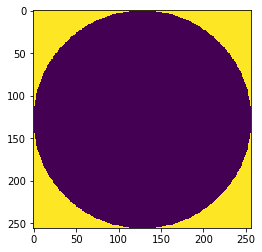

In [24]:
#create mask
mask2 = np.ones((400, 400), dtype=np.uint8)
for i in range(400):
    for j in range(400):
        if ((i - 200)**2 + (j - 200)**2) < 128**2:
            mask2[i, j] = 0
mask2 = mask2[72:-72, 72:-72]
plt.imshow(mask2)

In [ ]:
root = '../data/first_dataset'

In [36]:
objects_sz = []
names_sz = []
for fname in os.listdir(f'{root}/sz/pl100'):
    fname = fname[:-11]
    obj = np.zeros((5, 256, 256))
    for idx, freq in enumerate([100, 143, 217, 353, 545]):
        im = np.asarray(Image.open(f'{root}/sz/pl{freq}/{fname}_{freq}_gr.gif').convert('L')).copy()
        im = im[72:-72, 72:-72] / 255
        im[mask2 == 1] = -1
        obj[idx] = im
    names_sz.append(fname)
    objects_sz.append(obj)
# answers_sz = [1] * len(objects_sz)

In [37]:
sz_name = np.array(names_sz)
sz_data = np.stack(objects_sz)
np.savez_compressed('sz_oleg.npz', sz_data=sz_data, sz_names=sz_name)

In [42]:
objects_wo_sz = []
for fname in os.listdir(f'{root}/no_sz/s100_rand'):
    fname = fname[:-11]
    obj = np.zeros((5, 256, 256))
    for idx, freq in enumerate([100, 143, 217, 353, 545]):
        im = np.asarray(Image.open(f'{root}/no_sz/s{freq}_rand/{fname}_{freq}_gr.gif').convert('L')).copy()
        im = im[72:-72, 72:-72] / 255
        im[mask2 == 1] = -1
        obj[idx] = im
    objects_wo_sz.append(obj)
# answers_wo_sz = [0] * len(objects_wo_sz)

In [43]:
sz_data = np.stack(objects_wo_sz)
np.savez_compressed('wo_sz_oleg.npz', sz_data=sz_data)